#             $$\text{Gnu Radio Companion with Machine Learning} $$

In [1]:
%%time

import pandas as pd
import numpy as np
import warnings 
from Library.Model_Knn import  MultiLabelClass , Binary_Classification
from Library.CnnModel import TorchDataset
warnings.filterwarnings('ignore')



Clear = np.load("Data_\CLEAR_40SEC.npy")
WIFI_1M = np.load("Data_\WIFI1M_40SEC.npy")
LTE_1M = np.load("Data_\LTE_1M_40SEC.npy")


C:\Users\janat\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: total: 1.17 s
Wall time: 5.36 s


In [9]:
import os
import io
from Google import Create_Service
from googleapiclient.http import MediaIoBaseDownload

In [7]:
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
file_id   = "1yurXlQJzTlnBMFgqPZ-7pfj4fr4JXc663"
file = drive.CreateFile({'id': file_id})
file.GetContentFile('LTE_1M_40SEC.npy')
data = np.load('LTE_1M_40SEC.npy')


InvalidConfigError: Invalid client secrets file ('Error opening file', 'client_secrets.json', 'No such file or directory', 2)

In [7]:
df= MultiLabelClass(Clear,WIFI_1M ,LTE_1M,
               reshape=True,
                 sliced=6000000,
                   values_reshaped= 100,
                   random_state= 42, 
                   test_size = 0.275, shuffle = True) ; data = df.reshaped ;data

,Signals,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Label
0,CLEAR,0.000000,-0.000061,-0.000031,0.000031,-0.000061,-0.000031,0.000183,0.000000,0.000214,...,-0.000122,0.000214,-0.000305,0.000092,0.000031,-0.000153,-0.000031,-0.000031,-0.000031,0
1,CLEAR,-0.000183,-0.000214,0.000000,-0.000244,-0.000153,-0.000214,-0.000336,0.000092,0.000000,...,-0.000305,-0.000275,-0.000122,-0.000092,0.000061,0.000183,-0.000214,-0.000061,-0.000061,0
2,CLEAR,0.000122,-0.000183,0.000000,-0.000275,-0.000092,-0.000031,0.000000,-0.000092,-0.000183,...,-0.000122,0.000061,0.000153,-0.000153,0.000153,0.000122,0.000061,0.000092,-0.000061,0
3,CLEAR,-0.000183,-0.000244,-0.000153,-0.000061,0.000214,-0.000122,0.000183,-0.000153,-0.000031,...,-0.000061,0.000214,0.000000,0.000122,0.000000,0.000092,-0.000031,0.000092,-0.000031,0
4,CLEAR,0.000122,-0.000092,0.000244,-0.000214,-0.000092,0.000000,-0.000122,-0.000183,0.000183,...,0.000305,0.000092,-0.000092,0.000092,-0.000061,0.000214,0.000031,0.000122,0.000031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,LTE,-0.000183,-0.000183,0.000061,-0.000214,0.000092,0.000092,-0.000061,0.000244,-0.000305,...,0.000061,0.000031,-0.000061,-0.000244,-0.000061,0.000000,-0.000122,0.000153,-0.000183,2
359996,LTE,-0.000061,0.000153,-0.000061,-0.000031,-0.000092,-0.000153,-0.000031,-0.000214,-0.000122,...,-0.000031,0.000000,0.000122,-0.000122,-0.000122,-0.000031,-0.000244,0.000153,0.000061,2
359997,LTE,0.000061,0.000061,-0.000122,-0.000092,-0.000061,-0.000366,-0.000031,-0.000153,0.000153,...,-0.000397,0.000031,0.000122,-0.000183,0.000336,-0.000122,0.000031,0.000031,-0.000183,2
359998,LTE,0.000092,-0.000092,0.000122,-0.000275,-0.000214,0.000122,-0.000183,0.000183,-0.000061,...,0.000061,-0.000153,-0.000153,-0.000275,-0.000153,0.000061,-0.000153,0.000031,0.000183,2


In [8]:
X_train, X_test, y_train, y_test = df.spliting
print("X_train:", X_train.shape)
print("X_Test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (260999, 100)
X_Test: (99001, 100)
y_train: (260999,)
y_test: (99001,)


In [9]:
%%time
df.Knn(n_neighbors=17, weights='uniform', p=1)  

              precision    recall  f1-score   support

       CLEAR       0.32      0.43      0.37     33046
        WIFI       0.34      0.54      0.41     33061
         LTE       0.86      0.01      0.03     32894

    accuracy                           0.33     99001
   macro avg       0.50      0.33      0.27     99001
weighted avg       0.50      0.33      0.27     99001



In [10]:
df.metrics

,Score,Accuracy,F1-Score,Recall
0,0.330774,0.330774,0.270369,0.330774


In [8]:
df.matrix

array([[  197, 27246,     0],
       [  554, 26991,     0],
       [  445, 27067,     0]], dtype=int64)

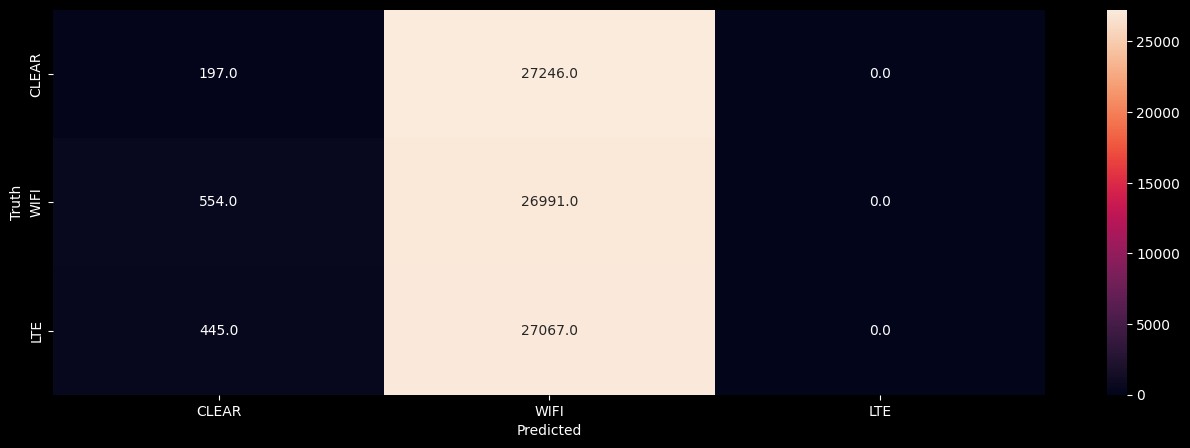

In [9]:
df.confusion_matrix()

### WIFI & CLEAR

In [2]:
df = Binary_Classification(Clear, WIFI_1M, sliced= 5000000, reshape = True,
                           values_reshaped = 10 ) ; data = df.reshaped ; data


,Signals,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Label
0,CLEAR,0.000000,-0.000061,-0.000031,0.000031,-0.000061,-0.000031,0.000183,0.000000,0.000214,...,-0.000122,0.000214,-0.000305,0.000092,0.000031,-0.000153,-0.000031,-0.000031,-0.000031,0
1,CLEAR,-0.000183,-0.000214,0.000000,-0.000244,-0.000153,-0.000214,-0.000336,0.000092,0.000000,...,-0.000305,-0.000275,-0.000122,-0.000092,0.000061,0.000183,-0.000214,-0.000061,-0.000061,0
2,CLEAR,0.000122,-0.000183,0.000000,-0.000275,-0.000092,-0.000031,0.000000,-0.000092,-0.000183,...,-0.000122,0.000061,0.000153,-0.000153,0.000153,0.000122,0.000061,0.000092,-0.000061,0
3,CLEAR,-0.000183,-0.000244,-0.000153,-0.000061,0.000214,-0.000122,0.000183,-0.000153,-0.000031,...,-0.000061,0.000214,0.000000,0.000122,0.000000,0.000092,-0.000031,0.000092,-0.000031,0
4,CLEAR,0.000122,-0.000092,0.000244,-0.000214,-0.000092,0.000000,-0.000122,-0.000183,0.000183,...,0.000305,0.000092,-0.000092,0.000092,-0.000061,0.000214,0.000031,0.000122,0.000031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,SINAL,-0.000031,0.000275,0.000244,0.000214,0.000122,0.000244,0.000000,0.000275,0.000000,...,-0.000122,-0.000122,0.000214,-0.000244,-0.000031,-0.000031,-0.000397,0.000153,0.000092,1
199996,SINAL,0.000214,0.000244,-0.000214,0.000275,0.000000,0.000122,0.000092,0.000061,-0.000214,...,-0.000031,0.000092,-0.000153,-0.000305,0.000092,-0.000397,0.000000,0.000122,0.000031,1
199997,SINAL,-0.000061,0.000183,-0.000031,0.000092,0.000031,0.000031,0.000092,0.000122,0.000031,...,0.000092,-0.000305,0.000336,0.000031,0.000305,-0.000275,0.000061,-0.000183,-0.000366,1
199998,SINAL,-0.000031,0.000031,0.000061,0.000305,-0.000031,0.000519,-0.000244,0.000122,-0.000183,...,0.000092,-0.000061,0.000153,0.000031,0.000153,0.000092,-0.000061,0.000214,-0.000153,1


In [3]:
X_train, X_test, y_train, y_test =df.Spliting(data,42, 0.275 , True)

print("X_train:", X_train.shape)
print("X_Test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (144999, 100)
X_Test: (55001, 100)
y_train: (144999,)
y_test: (55001,)


In [4]:
%%time
df.Knn(n_neighbors = 17, weights= 'uniform',p = 1)

              precision    recall  f1-score   support

       CLEAR       0.50      0.32      0.39     27408
       SINAL       0.50      0.68      0.58     27593

    accuracy                           0.50     55001
   macro avg       0.50      0.50      0.48     55001
weighted avg       0.50      0.50      0.48     55001



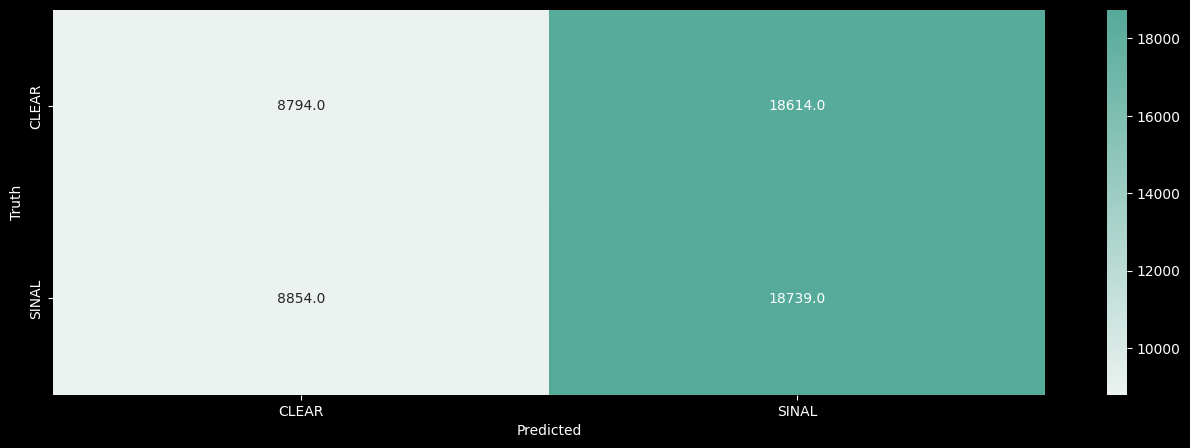

In [5]:
df.confusion_matrix()

In [6]:
df.matrix

array([[ 8794, 18614],
       [ 8854, 18739]], dtype=int64)